## Analisi delle simulazioni

In [595]:
import numpy as np
from scipy.io import savemat
import matplotlib.pyplot as plt
from analisirisultati import *

Tempo totale: 3505
Dimensioni della griglia: 90 Lx 90 Ly
Densità totale particelle 5.0


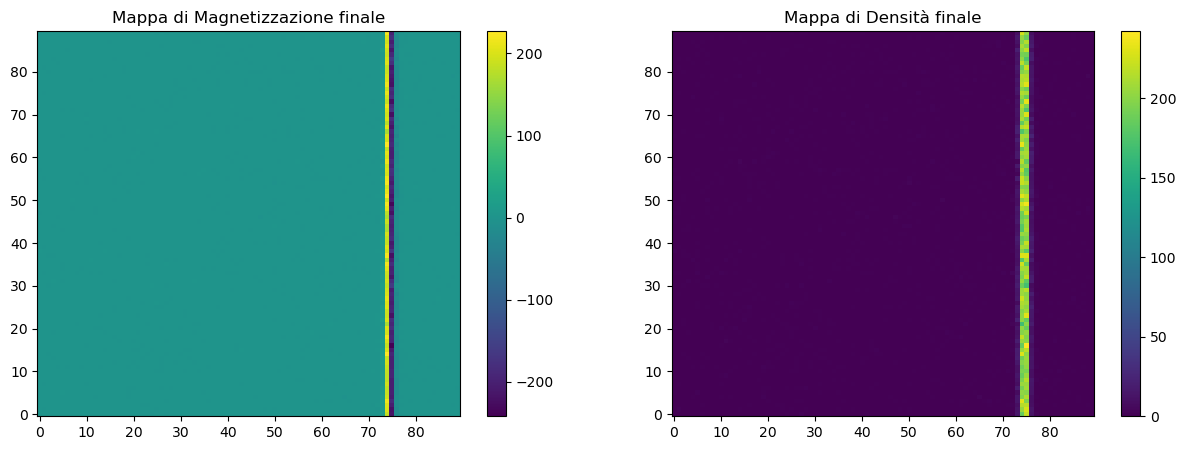

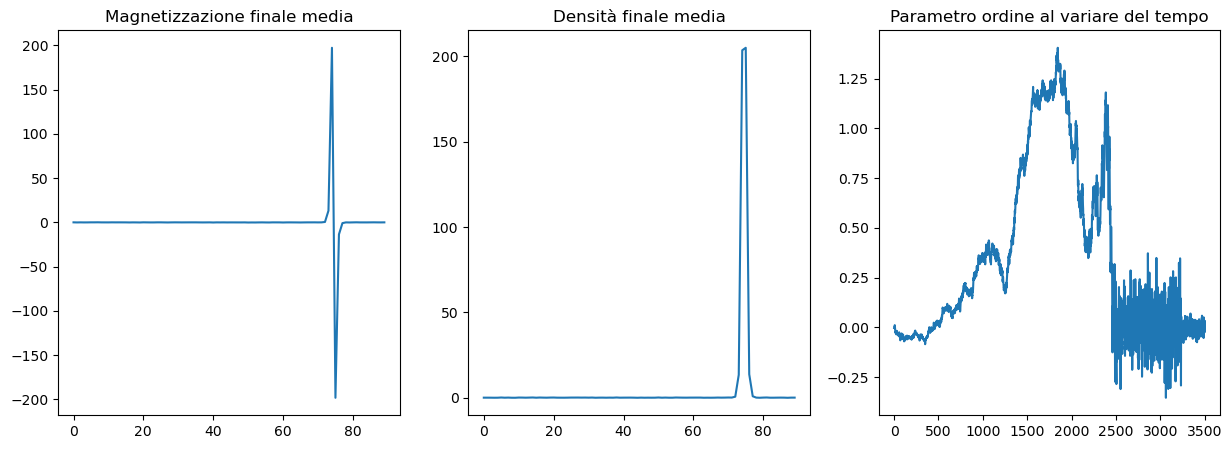

In [608]:
from scipy.io import loadmat # type: ignore

percorso = '/Users/annat/Dati/AIM simulation/AIM-simulation/5L90frames_m.mat'
percorso2 = '/Users/annat/Dati/AIM simulation/AIM-simulation/5L90frames_d.mat'

dati = loadmat(percorso)
dati2 = loadmat(percorso2)

T = 0.2
D = 1
gamma = 0.02
metodo_calcolo = 1
frames = 5_000
t_tot = 8_000_000

magnet = dati['frames_m']
magnet = np.array(magnet, dtype=np.float64)

density = dati2['frames_d']
density = np.array(density, dtype=np.float64)

magnet_finale = magnet[-1, :, :]
magnet_finale =  np.squeeze(magnet_finale)

density_finale = density[-1, :, :]
density_finale =  np.squeeze(density_finale)

tempo = np.shape(magnet)[0]
Lx = np.shape(magnet)[2]
Ly = np.shape(magnet)[1]
densità_particelle = np.sum(density_finale)/(Lx*Ly)
print('Tempo totale:', tempo)
print('Dimensioni della griglia:', Lx, 'Lx', Ly, 'Ly')
print('Densità totale particelle', densità_particelle)


plot_finali(magnet, density, tempo, Lx, Ly)

Soglia magnetizzazione (solo t=0): 12.006225959700567
Soglia magnetizzazione (media prime 50): 17.555031101979665
Soglia densità (solo t=0): 16.1745411704629
Soglia densità (media prime 50): 14.43125824578913


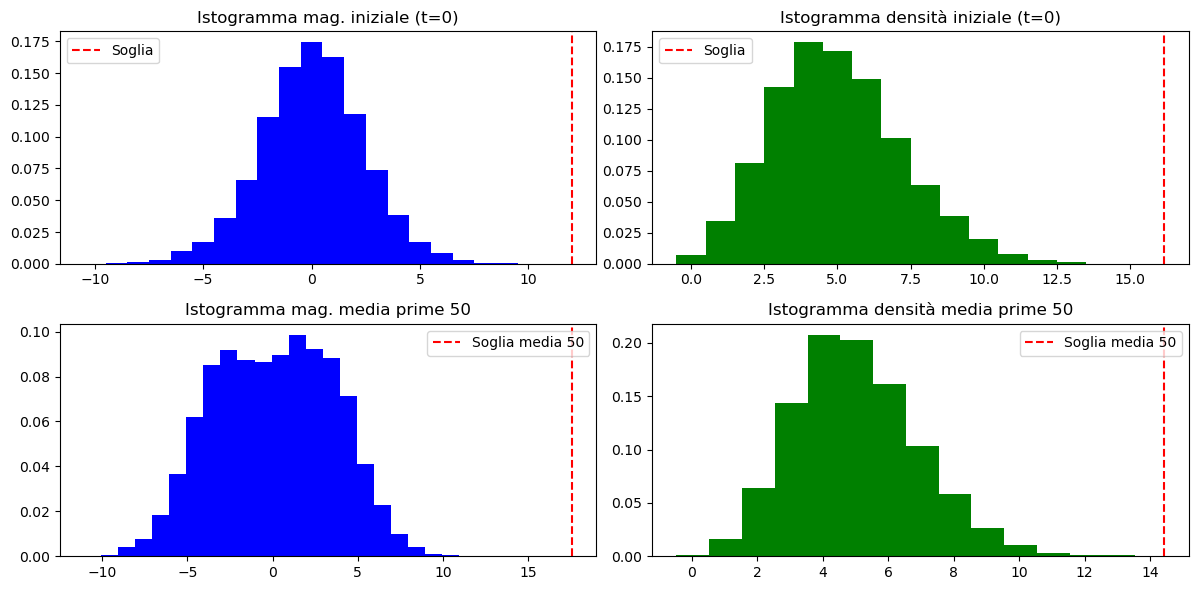

In [597]:
soglia = istogrammi_soglia(magnet, density, prime_immagini=50)

# Asters

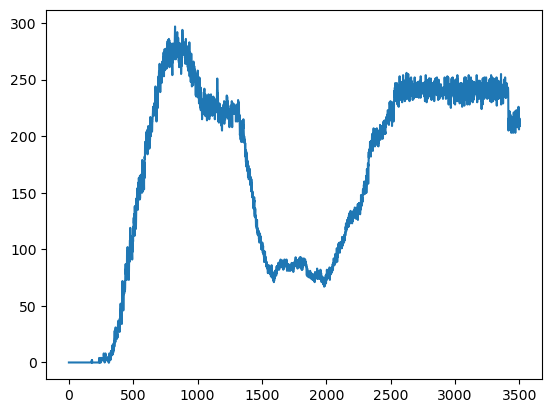

In [598]:
evoluzione_dentro(magnet, soglia, tempo)

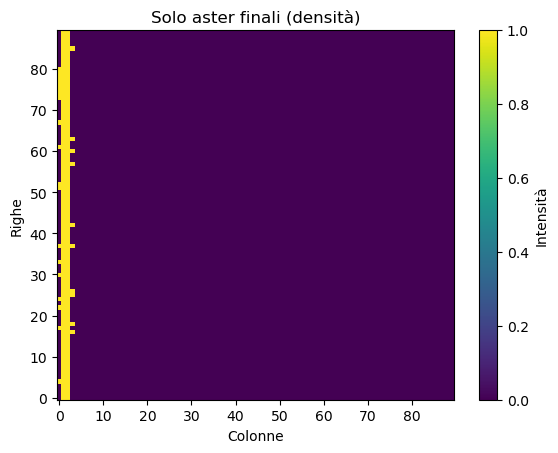

In [599]:
asters = heatmap_aster(density_finale, soglia)

plt.imshow(asters, cmap='viridis', aspect='auto', origin='lower')
plt.colorbar(label='Intensità')  # aggiunge barra dei colori
plt.title('Solo aster finali (densità)')
plt.xlabel('Colonne')
plt.ylabel('Righe')
plt.show()

(90, 90)
Numero di cluster: 1


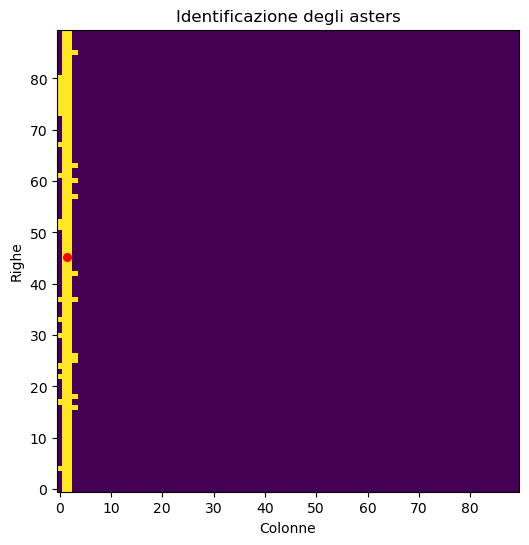

In [600]:
asters = heatmap_aster(np.squeeze(magnet[-1,:,:]), soglia)

print(asters.shape)

caratteristiche_cluster = caratterizzazione_aster(magnet_finale, soglia)
areas = caratteristiche_cluster[0]
centroids = caratteristiche_cluster[1]
num = areas.__len__()
print('Numero di cluster:', num)

fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(asters, cmap='viridis', origin='lower')
ax.set_title("Identificazione degli asters")
ax.set_xlabel("Colonne")
ax.set_ylabel("Righe")

# Disegno ogni centroide e un segmento che indica l'orientazione
for (cy, cx) in centroids:
    ax.scatter(cx, cy, c='red', s=30)

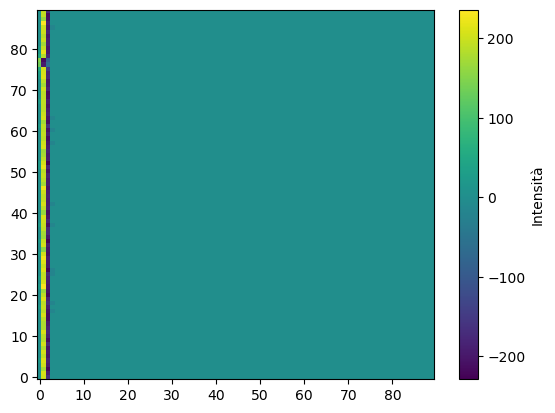

In [601]:
aster_finali_m = magnet_finale * asters
aster_finali_d = density_finale * asters

plt.imshow(aster_finali_m, cmap='viridis', aspect='auto', origin='lower')
plt.colorbar(label='Intensità')  # aggiunge barra dei colori
plt.show()

In [602]:
rate = print_probabilities(magnet_finale, density_finale, soglia, T, gamma, D, metodo_calcolo)

Probabilità(+ --> -) in siti con magnetizzazione negativa: 85.39% +/- 0.82%
Probabilità(+ --> -) in siti con magnetizzazione positiva: 0.0051% +/- 0.000065%
Probabilità(- --> +) in siti con magnetizzazione negativa: 0.0051% +/- 0.000052%
Probabilità(- --> +) in siti con magnetizzazione positiva: 84.89% +/- 0.97%


In [603]:
x_dentro, std1, x_fuori, std2 = approssimazioni(magnet_finale, density_finale, soglia, T)

beta*m/d (dentro): 4.8594 +/- 0.007873
beta*m/d (fuori): 4.9104 +/- 0.017080


In [604]:
massimo_m, i_max = massimo_magnet(magnet)
print('Massimo valore di magnetizzazione:', massimo_m)
print('Indice del frame con il massimo valore di magnetizzazione:', i_max)

Massimo valore di magnetizzazione: 261.0
Indice del frame con il massimo valore di magnetizzazione: 2907


In [605]:
tc = tempo_colonna_piena(magnet, soglia, t0= 200)
tr = tempo_righe_non_vuote(magnet, soglia, t0= 200)

print('Frame formazione aster (colonne):', tc)
print('Frame formazione aster (righe):', tr)

print('Tempo totale simulazione:', np.size(build_log_indices(t_tot, frames)))

Frame formazione aster (colonne): 3414
Frame formazione aster (righe): 3395
Tempo totale simulazione: 3505


In [606]:
if tr == np.size(build_log_indices(t_tot, frames)):
    print('No formazione aster lungo tutto il sistema')
else:
    tempocf = tempo_fisico(tc-1,t_tot,frames, T, D)
    temporf = tempo_fisico(tr-1,t_tot,frames, T, D)
    print('Tempo fisico formazione aster:', tempocf)
    print('Tempo fisico formazione aster:', temporf)

Tempo fisico formazione aster: 39301.22592609352
Tempo fisico formazione aster: 36997.21883072413


In [607]:
print(build_log_indices(100, 25))
print(build_log_indices(80,25))

[ 0  1  2  3  4  5  6  7  9 11 14 17 21 25 31 37 45 55 67 82 99]
[ 0  1  2  3  4  5  6  8 10 12 14 18 21 26 31 38 45 55 66 79]
